**Import Statements**

In [137]:
# sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
# pyplot
from matplotlib import pyplot as plt
# others
from scipy import stats as st
import pandas as pd
import numpy as np

**Loading Data & Preprocessing**

In [160]:
# read songs into pandas dataframe
df = pd.read_csv("genres_v2.csv")

# drop unnecessary features such as url
df.drop(columns=["type","id","uri","track_href","analysis_url","Unnamed: 0","title"], inplace=True)

# save old and map genres to labels
genres = df["genre"].unique()
df["genre"] = df["genre"].factorize()[0]

# save and remove songs feature
songs = df["song_name"]
df.drop("song_name", axis=1, inplace=True)

# show retained features
print(df.columns)
print(genres)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre'],
      dtype='object')
['Dark Trap' 'Underground Rap' 'Trap Metal' 'Emo' 'Rap' 'RnB' 'Pop'
 'Hiphop' 'techhouse' 'techno' 'trance' 'psytrance' 'trap' 'dnb'
 'hardstyle']


C:\Users\jeanp\AppData\Local\Temp\ipykernel_25548\1271855831.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("genres_v2.csv")


**Principal Component Analysis**

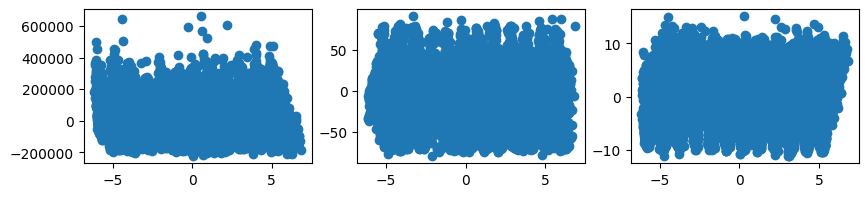

In [69]:
# create a PCA to reduce our dimensionality
pca = PCA(n_components=4)
pca.fit(df)

# reduce dataset
df_reduced = pd.DataFrame(pca.transform(df), columns=['A', 'B', 'C', 'D'])

# visualize newly reduced dataset
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 10, 2
axis[0].scatter(df_reduced['D'], df_reduced['A'])
axis[1].scatter(df_reduced['D'], df_reduced['B'])
axis[2].scatter(df_reduced['D'], df_reduced['C'])
plt.show()

**K-Means Playlist Generation**

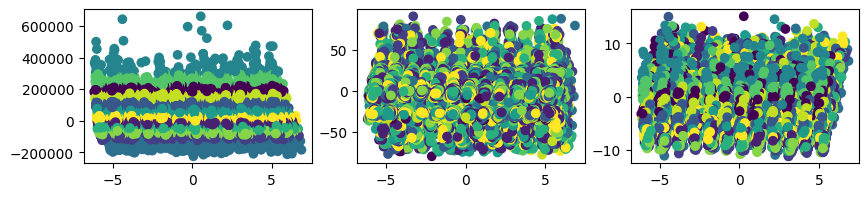

In [63]:
# fit the kmeans model to entire songlist
km = KMeans(n_clusters=12)
km.fit(df_reduced)

# classify data into separate playlists
playlists = km.labels_

# visualize newly categorized playlists
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 10, 2
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=playlists)
axis[1].scatter(df_reduced['D'], df_reduced['B'], c=playlists)
axis[2].scatter(df_reduced['D'], df_reduced['C'], c=playlists)
plt.show()

**GMM Playlist Generation**

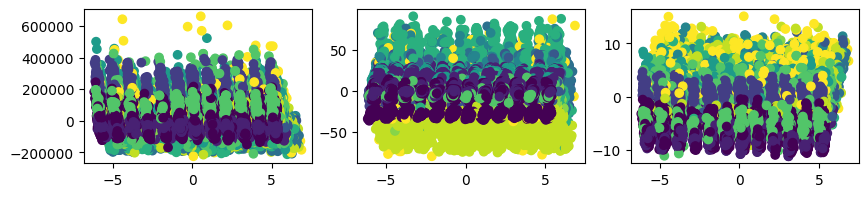

In [79]:
# fit the gmm model to entire songlist
gmm = GaussianMixture(n_components=12, init_params='k-means++')
gmm.fit(df_reduced)

# classify data into separate playlists
playlists = gmm.predict(df_reduced)

# visualize newly categorized playlists
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 10, 2
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=playlists)
axis[1].scatter(df_reduced['D'], df_reduced['B'], c=playlists)
axis[2].scatter(df_reduced['D'], df_reduced['C'], c=playlists)
plt.show()

**Spectral Clustering Playlist Generation**

In [ ]:
# fit the spectral clustering model to entire songlist
# and classify data into separate playlists
sc = SpectralClustering(n_clusters=12)
playlists = sc.fit_predict(df_reduced)

# visualize newly categorized playlists
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 10, 2
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=playlists)
axis[1].scatter(df_reduced['D'], df_reduced['B'], c=playlists)
axis[2].scatter(df_reduced['D'], df_reduced['C'], c=playlists)

**Quick Visualization of Playlist Classification**

Here we will show how different attributes influence the playlist classifier

In [192]:
def print_playlist(playlist_dict, allow_empty_name, num_songs):
    for i, playlist in enumerate(playlist_dict.values()):
        if not allow_empty_name:
            playlist = playlist[playlist["song_name"].notna()]
        genre_array = np.array(playlist["genre"])
        mode = st.mode(genre_array)
        if len(mode.mode) > 0:
            genre = genres.tolist()[st.mode(genre_array).mode[0]]
            print(i,": ",genre)
            print(playlist.sample(n=num_songs)["song_name"])

C:\Users\jeanp\AppData\Local\Temp\ipykernel_25548\883126917.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = st.mode(genre_array)
C:\Users\jeanp\AppData\Local\Temp\ipykernel_25548\883126917.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  genre = genr

1 :  Hiphop
18705                        Airborne Aquaruim
17547                           Lose My Breath
14380                                  Circles
18649                        Figg Get Da Money
18274                        Really Don't Care
19354    Hands On The Wheel (feat. A$AP Rocky)
17072                           One Night Only
Name: song_name, dtype: object
3 :  RnB
15657    Wasted (feat. Juicy J)
13945              Shadow Moses
18452         How Do You Sleep?
16572    Turn Heads feat. Lloyd
3343                     Psycho
19519               Mockingbird
15838    Dirt Off Your Shoulder
Name: song_name, dtype: object
4 :  Underground Rap
679      Between the Devil and the Darkness
10302                               Dip Dip
11078                                  WOAH
9021                                One Two
7158                                ENERGON
7209                            Floor Seats
10979                             BLOODBATH
Name: song_name, dtype: object
5 : 

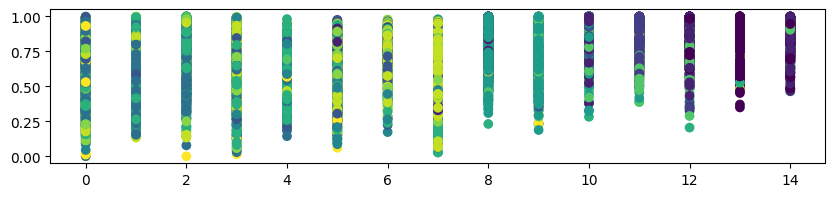

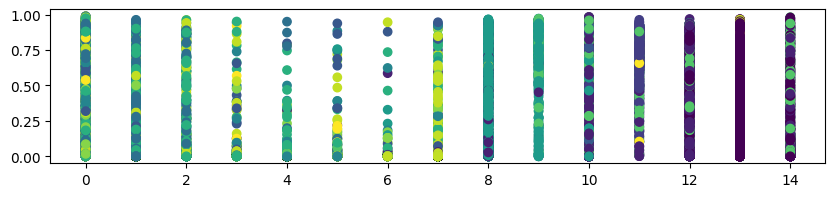

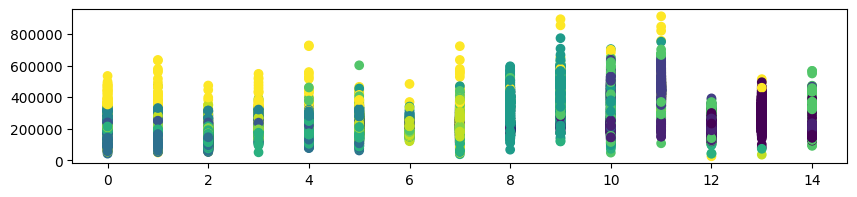

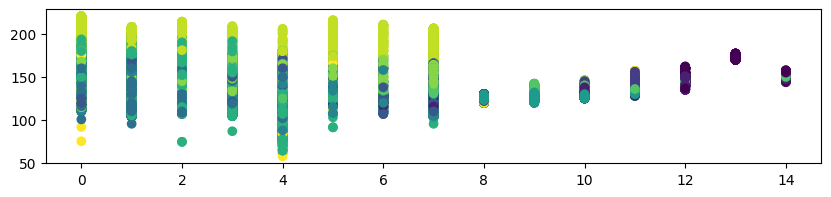

In [193]:
# add the new playlist feature
df["playlist"] = playlists

# add back our song name feature
df["song_name"] = songs

# group songs by playlist
playlist_dict = dict(tuple(df.groupby("playlist")))
# print_playlist(playlist_dict, empty_name=True)
print_playlist(playlist_dict, allow_empty_name=False, num_songs=7)

plt.scatter(df["genre"], df["energy"], c=playlists)
plt.show()
plt.scatter(df["genre"], df["instrumentalness"], c=playlists)
plt.show()
plt.scatter(df["genre"], df["duration_ms"], c=playlists)
plt.show()
plt.scatter(df["genre"], df["tempo"], c=playlists)
plt.show()

**Playlist Name Generation**

**Classifying New Songs**